## Observations and Insights

While performing this analysis on Pymaceuticals Inc datasets. I noticed a few different insights. The insights are below:

1. In the Tumor Response to Treatment table, the tumor volumes decrease significantly when using Capomulin and Ramicane.

2. When comparing percent change for tumor size over 45 days for all drugs, Capomulin and Ramicane were the only two drugs which decreased tumors size.

3. Ketapril group’s average tumor volumes increased the most at 57%--worse than placebo group

4. The recommend treatment would be the administer the Capomulin and Ramicane drugs.


## Dependencies and starter code

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress

import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_merge = pd.merge(study_results, mouse_metadata, on="Mouse ID", 
                      how="left")
data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistical_group = data_merge.groupby("Drug Regimen")

mean_tumor = statistical_group["Tumor Volume (mm3)"].mean()
median_tumor = statistical_group["Tumor Volume (mm3)"].median()
variance_tumor = statistical_group["Tumor Volume (mm3)"].var()
std_dev_tumor = statistical_group["Tumor Volume (mm3)"].std()
sem_tumor = statistical_group["Tumor Volume (mm3)"].sem()

# Create a data frame to hold the results
statistical_summary = pd.DataFrame({"Mean Tumor Volume":mean_tumor, 
                                    "Median Tumor Volume":median_tumor, 
                                    "Tumor Volume Variance":variance_tumor, 
                                    "Tumor Volume Std. Dev.":std_dev_tumor, 
                                    "Tumor Volume Std. Err.":sem_tumor})

# Display the summary data frame
sum_of_data = statistical_summary[["Mean Tumor Volume", 
                                   "Median Tumor Volume", 
                                   "Tumor Volume Variance", 
                                   "Tumor Volume Std. Dev.", 
                                   "Tumor Volume Std. Err."]]
sum_of_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistical_group = data_merge.groupby("Drug Regimen")

mean_tumor = statistical_group["Tumor Volume (mm3)"].mean()
median_tumor = statistical_group["Tumor Volume (mm3)"].median()
variance_tumor = statistical_group["Tumor Volume (mm3)"].var()
std_dev_tumor = statistical_group["Tumor Volume (mm3)"].std()
sem_tumor = statistical_group["Tumor Volume (mm3)"].sem()

# Create a data frame to hold the results
statistical_summary = pd.DataFrame({"Mean":mean_tumor, 
                                    "Median":median_tumor, 
                                    "Var":variance_tumor, 
                                    "Std":std_dev_tumor, 
                                    "Sem":sem_tumor})

# Display the summary data frame
sum_of_data = statistical_summary[["Mean", "Median", "Var", 
                                   "Std", "Sem"]]
sum_of_data

,Mean,Median,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

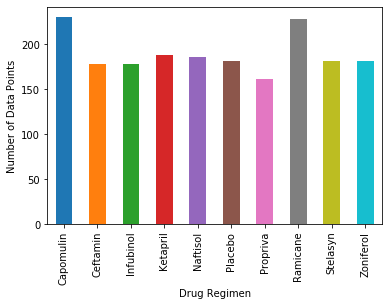

<Figure size 432x288 with 0 Axes>

In [47]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_regimen = statistical_group['Drug Regimen'].count()
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
          "tab:brown", "tab:pink", "tab:grey", "tab:olive", "tab:cyan"]

# Create a bar chart based off of the group series from before
regimen_chart = count_regimen.plot(kind='bar', color=colors)

# Set the xlabel and ylabel using class methods
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Data Points")


plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x1a15786e48>,
 <a list of 10 Text xticklabel objects>)

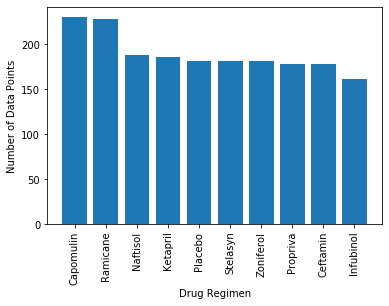

In [48]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimens = ("Capomulin", "Ramicane","Naftisol", "Ketapril", 
            "Placebo", "Stelasyn", "Zoniferol", "Ceftamin", 
            "Infubinol", "Propriva")

#regimens = statistical_group['Drug Regimen']
point_in_regimen = [230, 228, 188, 186, 181, 181, 182, 178, 178, 161]
x_axis = np.arange(len(regimens))

# Create a bar chart based upon the above data
plt.bar(regimens,point_in_regimen, color="tab:blue", align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
#plt.xticks(x_axis, regimens)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane","Naftisol", "Ketapril", 
                            "Placebo", "Stelasyn", "Zoniferol", "Propriva", 
                            "Ceftamin", "Infubinol"], rotation='vertical')

## Pie plots

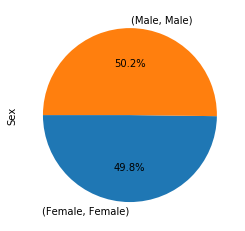

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = mouse_metadata.groupby("Sex")
count_gender = gender_group['Sex'].value_counts()

# Create a bar chart based off of the group series from before
gender_chart = count_gender.plot(kind='pie', startangle=180, autopct='%1.1f%%')

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["tab:orange", "tab:blue"]



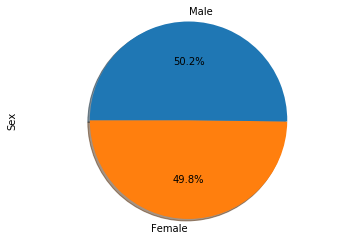

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_group = mouse_metadata.groupby("Sex")
count_gender = gender_group['Sex'].value_counts()

colors = ["tab:orange", "tab:blue"]
explode = (0,0)
genders = ["Female", "Male"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(count_gender, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
# Create axes which are equal so we have a perfect circle
plt.ylabel("Sex")
plt.axis("equal")

plt.show()

## Quartiles, outliers and boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. #Day 3 of Matplotlib

cap_df = data_merge.loc[data_merge["Drug Regimen"] == "Capomulin",:]
ram_df = data_merge.loc[data_merge["Drug Regimen"] == "Ramicane", :]
inf_df = data_merge.loc[data_merge["Drug Regimen"] == "Infubinol", :]
ceft_df = data_merge.loc[data_merge["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [55]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, data_merge, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [56]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers
# treatments - Capomulin, Ramicane, Infubinol, and Ceftamin

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [58]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, data_merge, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [59]:
#Ramicane
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [61]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, data_merge, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [64]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, data_merge, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [65]:
#Ceftamin
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


In [62]:
#Infubinol
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


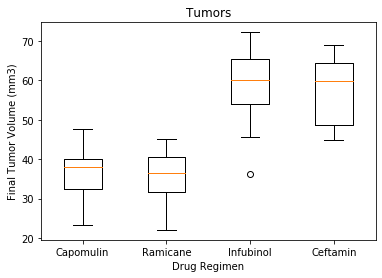

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# The second example again looks at the LAX temperature data set and computes quantiles

data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

In [ ]:
#Groupby drug and timepoint to get the mean tumor volume across time
tumor_vol = data_merge.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]

tumor_vol = tumor_vol.reset_index()
tumor_vol = tumor_vol.pivot(index = "Timepoint", columns = "Drug Regimen")["Tumor Volume (mm3)"]
tumor_vol = tumor_vol.reset_index()
tumor_vol

## Line and scatter plots

In [72]:
forline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
forline_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


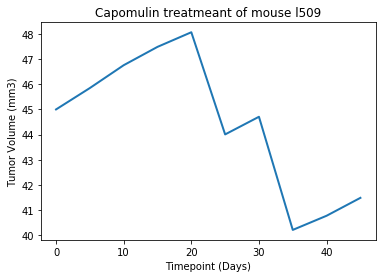

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

timepoints = forline_df["Timepoint"]
tumorvol = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

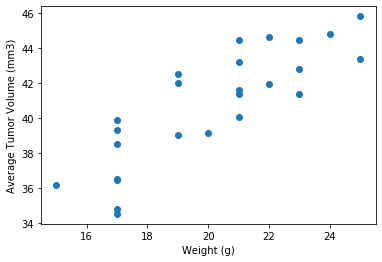

In [76]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [ ]:
mouse_wgt = data_merge.groupby("Weight (g)")
tumor_vol = mean_tumor.mean()
mouse_wgt.plot(kind="scatter", x="Weight (g)", y="Averge Tumor Volume", figsize=(8,8))
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

In [78]:
# Calculate the correlation coefficient and for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [97]:
graph = st.linregress(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
graph

mslope = 0.9544396890241045
bintercept = 21.552160532685015

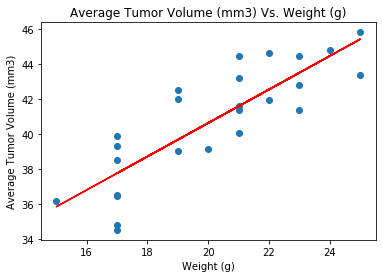

In [99]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen

yvalues = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],yvalues,color="red")
plt.title('Average Tumor Volume (mm3) Vs. Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()